In [1]:
from fourier_analysis import FourierAnalysis, window_data
import matplotlib.pyplot as plt
import yt

In [ ]:
# Load the sloshing dataset
ds = yt.load_sample("GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0150")

yt : [INFO     ] 2025-10-07 18:28:19,965 'GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0150' is not available locally. Looking up online.
yt : [INFO     ] 2025-10-07 18:28:19,965 Downloading from https://yt-project.org/data/GasSloshing.tar.gz
100%|████████████████████████████████████████| 346M/346M [00:00<00:00, 822GB/s]
yt : [INFO     ] 2025-10-07 18:28:44,919 Untaring downloaded file to '/Users/jzuhone/Data/yt/test_outputs'
yt : [INFO     ] 2025-10-07 18:28:49,401 Parameters: current_time              = 1.1835090993823291e+17
yt : [INFO     ] 2025-10-07 18:28:49,401 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-10-07 18:28:49,402 Parameters: domain_left_edge          = [-3.70272e+24 -3.70272e+24 -3.70272e+24]
yt : [INFO     ] 2025-10-07 18:28:49,402 Parameters: domain_right_edge         = [3.70272e+24 3.70272e+24 3.70272e+24]
yt : [INFO     ] 2025-10-07 18:28:49,402 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2025-10-07 18:29:00,429 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2025-10-07 18:29:00,429 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2025-10-07 18:29:00,431 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2025-10-07 18:29:00,431 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2025-10-07 18:29:00,434 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-10-07 18:29:00,585 Making a fixed resolution buffer of (('gas', 'kT')) 800 by 800



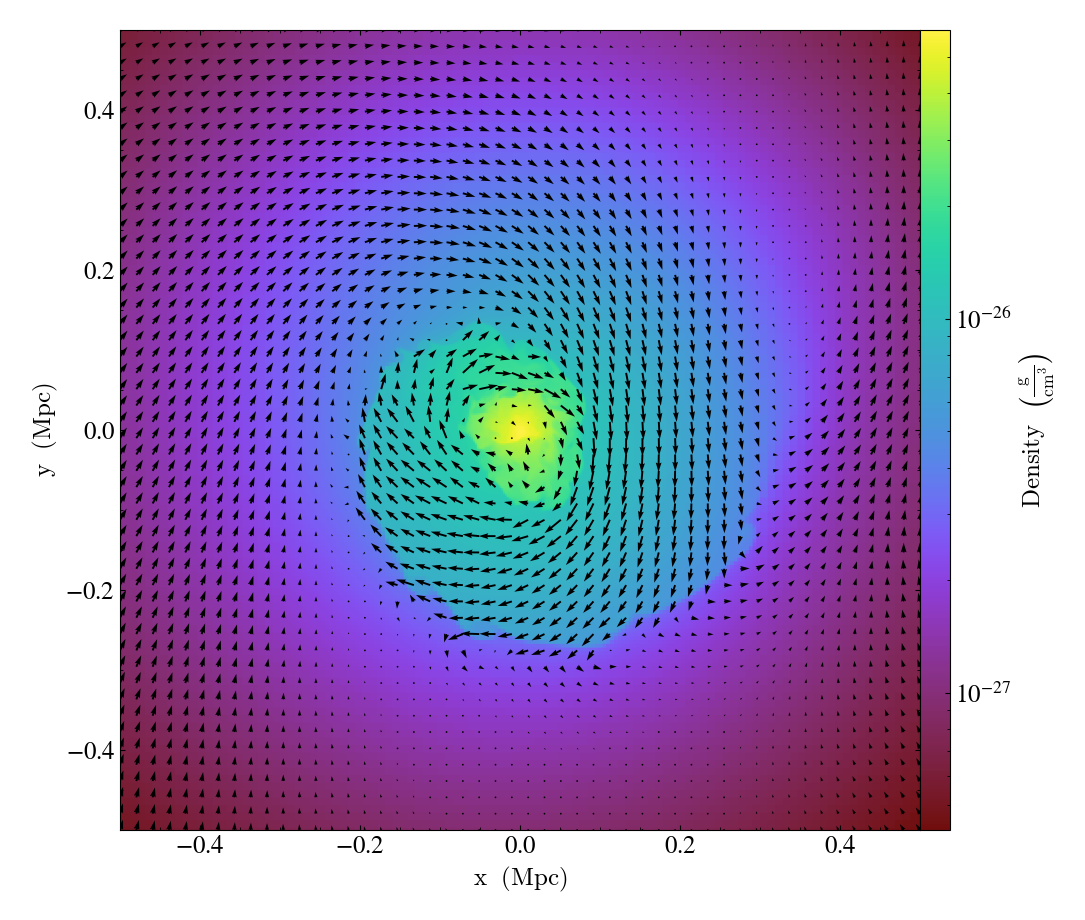
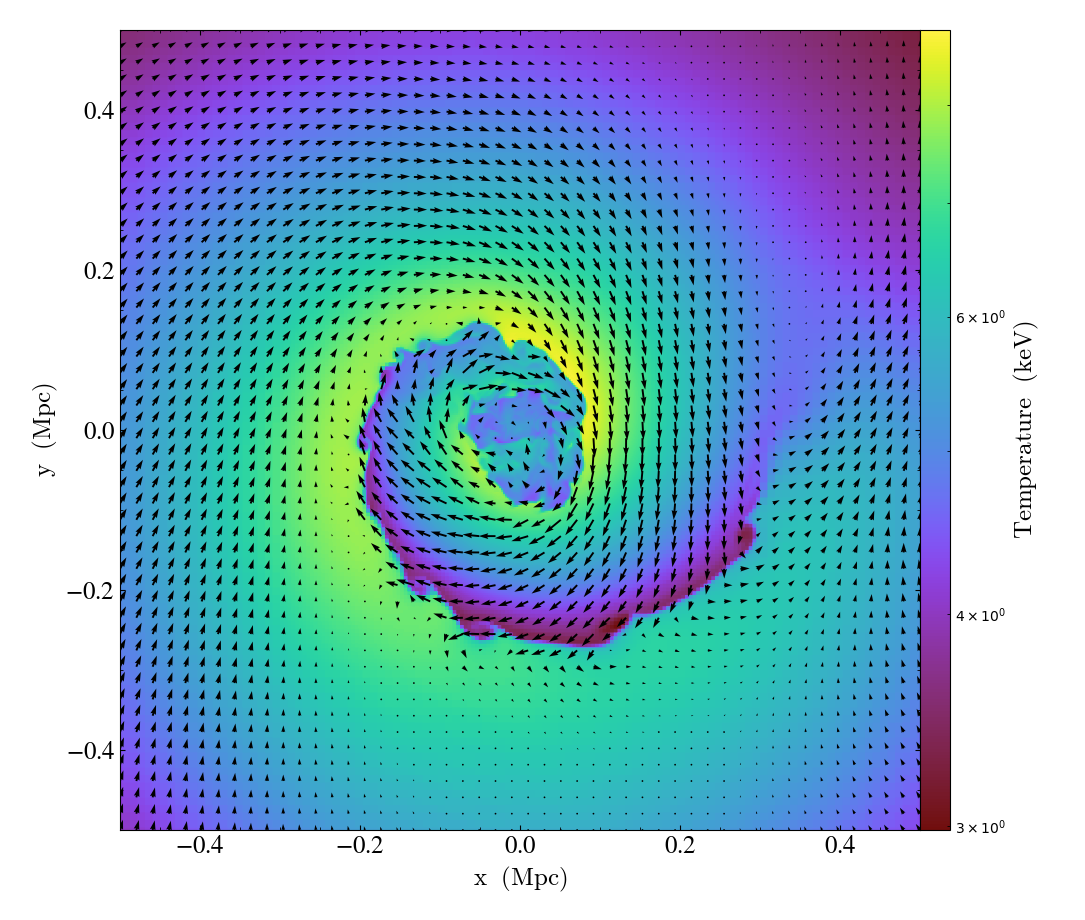

In [ ]:
# Plot a slice of the density and temperature to see what it looks like, 
# and annotate with velocity vectors
slc = yt.SlicePlot(
    ds,
    "z",
    [("gas", "density"), ("gas", "kT")],
    width=(1.0, "Mpc"),
)
slc.annotate_velocity()

In [4]:
# This is the width of the grid on a side (here in kpc, but could be anything)
W = ds.arr([400.0] * 3, "kpc")
ddims = [128] * 3

In [ ]:
# Use the domain center as the center for the grid
c = ds.domain_center.to("kpc")

In [ ]:
# Make a grid object which is uniformly gridded at center c with width W and ddims cells
grid = ds.r[
    c[0] - W[0] / 2 : c[0] + W[0] / 2 : ddims[0] * 1j,
    c[1] - W[1] / 2 : c[1] + W[1] / 2 : ddims[1] * 1j,
    c[2] - W[2] / 2 : c[2] + W[2] / 2 : ddims[2] * 1j,
]

In [7]:
# This is a class I wrote to simplify stuff
fa = FourierAnalysis(W, ddims)

In [ ]:
# Get the x-velocity field in km/s on the grid
vx = grid[("gas", "velocity_x")].to_value("km/s")

In [ ]:
# here I am applying a hanning window to the data to fix the 
# fact that this is a non-periodic box and avoid aliasing
# we will make a copy to illustrate the difference between 
# windowed and unwindowed data with respect to the power spectrum
vxw = vx.copy()
window_data(vxw)

In [10]:
# Get the power spectrum of each spatial component
nbins = 60  # Number of bins for the power spectrum, it will
# use the min-max wavenumbers as boundaries
k, Pk = fa.make_powerspec(vx, nbins)
kw, Pkw = fa.make_powerspec(vxw, nbins)

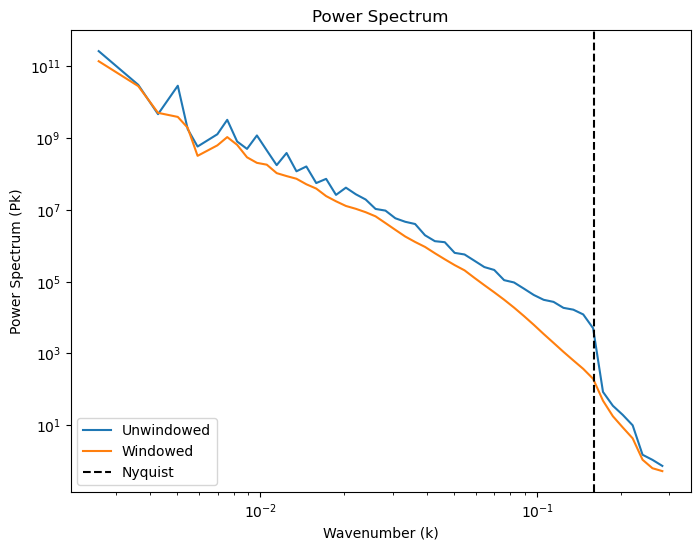

In [ ]:
# Now let's plot both the windowed and unwindowed power spectra
dx = W[0] / ddims[0]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(k, Pk, label="Unwindowed")
ax.loglog(kw, Pkw, label="Windowed")
ax.set_xlabel("Wavenumber (k)")
ax.set_ylabel("Power Spectrum (Pk)")
ax.set_title("Power Spectrum")
ax.axvline(1.0 / (2.0 * dx), color="k", ls="--", label="Nyquist")
ax.legend()